# 1. 기본설정
- 코랩 드라이브 연결
- warning 금지
- max_columns 출력
- 한글 표현화를 위한 처리

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 맷플롯립을 가져온다.
import matplotlib as mpl

# 맷플롯립에서 pyplot라는 서브패키지(모듈)를 가져온다.
import matplotlib.pyplot as plt

# 넘파이를 가져온다. 
import numpy as np

# 맷플롯립에서 폰트매니저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm
# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null
# [필요하다면] 설치된 폰트 파일의 파일 이름 확인
# fm._rebuild()
# sorted([f.name 
#        for f in fm.fontManager.ttflist 
#        if f.name.startswith("Nanum")])
# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)

# 파이플롯에서 사용할 글꼴만 지정하고 싶다면 위 문장 대신 아래 문장 사용
plt.rc('font', family='NanumSquareRound') 

fm._rebuild()

# 2. 청소년 데이터 youth_df.csv 재가공 하기
 - 기본적으로 전처리된 청소년 자료.
 - 결측치가 많은 columns과 기타 결측치를 포함한 data 삭제
 - 2018.1.1.~2022.5.까지 자료

## 2.1. 청소년 데이터 불러오기

In [ ]:
# 청소년 체력 데이터 불러오기
%cd '/content/gdrive/MyDrive/class7/00_sbs/핵심역량프로젝트/지성'
youth_df = pd.read_csv('youth_df.csv')

/content/gdrive/MyDrive/class7/00_sbs/핵심역량프로젝트/지성


In [ ]:
%cd '/content/gdrive/MyDrive/class7/00_온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기'

youth_df
youth_df.drop(columns=['Unnamed: 0'], inplace=True)
youth_df

/content/gdrive/.shortcut-targets-by-id/1N1s8vhguqw4WIGdcNXcBhWiF00DpHk-W/온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기


,측정회차,센터명,나이구분,측정구분,연령(만),입력구분,상장구분,측정일,성별,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,맥압
0,1,노원,청소년,일반,17.0,관리자,참가증,20180102,M,173.5,88.30,31.1,74.0,130.0,26.0,2.0,21.26,0.390,72.285,29.3,20.0,45.4,56.0
1,2,세종,청소년,일반,13.0,인바디,참가증,20180102,F,153.5,44.12,17.6,73.0,120.0,38.0,21.4,19.30,0.477,62.698,18.7,15.0,45.7,47.0
2,1,노원,청소년,일반,15.0,관리자,3등급,20180102,M,179.6,64.50,14.7,53.0,106.0,47.0,6.0,19.22,0.514,52.381,20.0,40.0,50.5,53.0
3,1,순천,청소년,일반,16.0,인바디,참가증,20180102,M,160.9,56.22,13.8,78.0,123.0,64.0,19.1,19.60,0.638,43.414,21.7,35.0,76.8,45.0
4,1,순천,청소년,일반,17.0,인바디,3등급,20180102,F,161.0,46.04,22.3,80.0,120.0,21.0,12.5,26.00,0.415,49.322,17.8,26.0,58.8,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182105,1,KSPO아산(출장),청소년,출장,16.0,관리자,2등급,20220530,F,165.4,56.20,24.6,67.0,133.0,44.0,18.1,22.78,0.511,48.305,20.5,26.0,50.2,66.0
182106,1,KSPO아산(출장),청소년,출장,16.0,관리자,참가증,20220530,F,158.7,48.20,32.3,76.0,124.0,19.0,3.8,28.50,0.424,54.434,19.1,13.0,48.1,48.0
182107,1,광주,청소년,출장,18.0,관리자,2등급,20220530,M,174.0,72.40,20.1,71.0,120.0,48.0,22.0,18.31,0.557,58.765,23.9,63.0,68.5,49.0
182108,1,KSPO아산(출장),청소년,출장,16.0,관리자,1등급,20220530,F,161.7,47.90,20.9,52.0,93.0,42.0,26.9,20.93,0.503,65.724,18.3,51.0,56.8,41.0


# 3. ML 모델만들기

## 3.1. 선형회귀 모델 만들기
 - 3.1.1. 기본 선형회귀 모델 만들기
 - 3.1.2. 라쏘 회귀 모델 만들기

### 3.1.1. 기본 선형회귀 모델 만들기
1. 기본데이터
        need_col = ['연령(만)', '성별', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)
       '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력']

2. 요약
        - ML으로 체지방율 예측
        - 체지방율, BMI를 이용한 비만 등급 계산

In [ ]:
df_1 = youth_df.copy()
df_1['성별'] = df_1['성별'].replace({'M':0, 'F':1})

In [ ]:
df_1.head()

,측정회차,센터명,나이구분,측정구분,연령(만),입력구분,상장구분,측정일,성별,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,맥압
0,1,노원,청소년,일반,17.0,관리자,참가증,20180102,0,173.5,88.30,31.1,74.0,130.0,26.0,2.0,21.26,0.390,72.285,29.3,20.0,45.4,56.0
1,2,세종,청소년,일반,13.0,인바디,참가증,20180102,1,153.5,44.12,17.6,73.0,120.0,38.0,21.4,19.30,0.477,62.698,18.7,15.0,45.7,47.0
2,1,노원,청소년,일반,15.0,관리자,3등급,20180102,0,179.6,64.50,14.7,53.0,106.0,47.0,6.0,19.22,0.514,52.381,20.0,40.0,50.5,53.0
3,1,순천,청소년,일반,16.0,인바디,참가증,20180102,0,160.9,56.22,13.8,78.0,123.0,64.0,19.1,19.60,0.638,43.414,21.7,35.0,76.8,45.0
4,1,순천,청소년,일반,17.0,인바디,3등급,20180102,1,161.0,46.04,22.3,80.0,120.0,21.0,12.5,26.00,0.415,49.322,17.8,26.0,58.8,40.0


# 여기서부터 테스트 시작

In [ ]:
#train1
# train = df_1[df_1['측정일'] < 20220101]
# test = df_1[df_1['측정일'] >= 20220101]

#train2
# train = df_1[df_1['측정일'] < 20210101]
# test = df_1[df_1['측정일'] >= 20220101]

#train3
# train = df_1[df_1['측정일'] < 20200101]
# test = df_1[df_1['측정일'] >= 20220101]

#train4
# train = df_1[(df_1['측정일'] < 20220101) & (df_1['측정일'] > 20180101)]
# test = df_1[df_1['측정일'] >= 20220101]
# test.head()

#train5 - 코로나 시기만
train = df_1[(df_1['측정일'] < 20220101) & (df_1['측정일'] > 20200101)]
test = df_1[df_1['측정일'] >= 20220101]

In [ ]:
# need_col = ['측정일', '연령(만)', '성별',
#        '반복점프(회)',
#        '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
#        '20m왕복오래달리기(회)', '상대악력']

col1 = ['연령(만)','성별', '신장', '체중']
# col2 = ['지역_0', '지역_1', '지역_2', '지역_3', '지역_4','년생', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중', 
#         윗몸말아올리기, 반복점프, '협응력', 20m왕복]
# col3 = ['지역_0', '지역_1', '지역_2', '지역_3', '지역_4','년생', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중']

train_y = train[['체지방율']]
train_X = train[col1]
test_y = test[['체지방율']]
test_X = test[col1]


In [ ]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_X.shape)
print(test_X.columns)

(20694, 4) (20694, 1)
(21522, 4) (21522, 4)
Index(['연령(만)', '성별', '신장', '체중'], dtype='object')


In [ ]:
# 데이터 polynomailfeatures & scaling
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(train_X)
dummy_train_X = pd.DataFrame(pf.fit_transform(train_X), columns=pf.get_feature_names_out(input_features=train_X.columns))
dummy_test_X = pd.DataFrame(pf.fit_transform(test_X), columns=pf.get_feature_names_out(input_features=test_X.columns))

ss = StandardScaler()
# Polynomical 한것.
scaled_train_X = pd.DataFrame(ss.fit_transform(dummy_train_X), columns=dummy_train_X.columns)
scaled_train_X.head()
scaled_test_X = pd.DataFrame(ss.transform(dummy_test_X), columns=dummy_test_X.columns)
scaled_test_X.head()

#polynomial 안한 것.
# scaled_train_X = pd.DataFrame(ss.fit_transform(train_X), columns=train_X.columns)
# scaled_train_X.head()
# scaled_test_X = pd.DataFrame(ss.transform(test_X), columns=test_X.columns)
# scaled_test_X.head()

,연령(만),성별,신장,체중,연령(만)^2,연령(만) 성별,연령(만) 신장,연령(만) 체중,성별^2,성별 신장,성별 체중,신장^2,신장 체중,체중^2
0,1.240597,-0.855827,0.099329,-0.234508,1.296605,-0.848694,1.049789,0.222267,-0.855827,-0.85498,-0.827869,0.074243,-0.211257,-0.306683
1,1.240597,-0.855827,1.151757,-0.287618,1.296605,-0.848694,1.530931,0.170882,-0.855827,-0.85498,-0.827869,1.158904,-0.072790,-0.351097
2,0.626457,-0.855827,-0.030747,-0.035343,0.608907,-0.848694,0.488457,0.185870,-0.855827,-0.85498,-0.827869,-0.055934,-0.062146,-0.134927
3,1.240597,-0.855827,0.560505,0.767952,1.296605,-0.848694,1.260626,1.192150,-0.855827,-0.85498,-0.827869,0.542661,0.763640,0.641239
4,1.240597,-0.855827,0.643281,-0.380561,1.296605,-0.848694,1.298469,0.080959,-0.855827,-0.85498,-0.827869,0.627873,-0.245148,-0.427414


In [ ]:
# 사이킷런으로 저장한 모형을 저장하고 적재할 때 쓰는 함수
# from sklearn.externals import joblib
import joblib

# 모형 저장하기 
joblib.dump(pf, "polyfeatures_1.pkl")
joblib.dump(ss, "standscaler_2.pkl")

['standscaler_2.pkl']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


lr = LinearRegression()
lr.fit(scaled_train_X, train_y)

pred_train = lr.predict(scaled_train_X)
pred_test = lr.predict(scaled_test_X)

In [ ]:
import joblib

# 모형 저장하기 
joblib.dump(lr, "lr_model_3.pkl")

['lr_model_3.pkl']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

metrics = []

for y, pred_y in [(train_y, pred_train), (test_y, pred_test)]:
    MAE = mean_absolute_error(y, pred_y)
    MSE = mean_squared_error(y, pred_y)
    RMSE = np.sqrt(mean_squared_error(y, pred_y))
    R2 = r2_score(y, pred_y)
    metrics.append((MAE, MSE, RMSE, R2))

pd.DataFrame({'train':metrics[0], 'test':metrics[1]}, index=['MAE', 'MSE', 'RMSE', 'R2'])

,train,test
MAE,3.432452,3.358549
MSE,19.327605,18.654374
RMSE,4.396317,4.319071
R2,0.788875,0.793149


---
# 여기까지!!

In [ ]:
# print(type(pred_test_y.shape))
# print(type(test_y.shape))
# print(pred_test_y.shape)
# print(test_y.shape)
# print(type(test_X.to_numpy))
test = np.hstack((test_y, pred_test_y)) # 이게 차원수가 맞아야 결합을 시켜주네~
test_df = pd.DataFrame(test, columns=['체지방율(측정)', '체지방율(예측)'], index=(test_X.index.values.astype(int)))
print(test.shape)

NameError: ignored

In [ ]:
result_df = pd.merge(test_X, test_df, how='left', on=test_X.index)
result_df.index = result_df['key_0']
result_df.index.name = ''
result_df.drop(columns=['key_0'], inplace=True)
result_df

,연령(만),성별,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,체지방율(측정),체지방율(예측)
,,,,,,,,,,,,
160588,18.0,0,56.0,15.7,18.05,0.551,53.799,21.6,47.0,64.1,16.2,17.535915
160589,18.0,0,56.0,22.7,16.96,0.648,51.312,19.3,41.0,60.9,9.5,14.318044
160590,17.0,0,61.0,22.1,17.15,0.614,45.410,23.0,30.0,76.3,11.2,17.366811
160591,18.0,0,50.0,14.2,19.25,0.563,44.880,25.8,37.0,58.3,26.1,24.148964
160592,18.0,0,53.0,20.5,19.69,0.601,41.792,19.8,80.0,67.8,12.7,12.970763
...,...,...,...,...,...,...,...,...,...,...,...,...
182105,16.0,1,44.0,18.1,22.78,0.511,48.305,20.5,26.0,50.2,24.6,27.322219
182106,16.0,1,19.0,3.8,28.50,0.424,54.434,19.1,13.0,48.1,32.3,28.822122
182107,18.0,0,48.0,22.0,18.31,0.557,58.765,23.9,63.0,68.5,20.1,18.786557


In [ ]:
# bmi 등급 나누기

def bmi_grade(bmi):
    if bmi <= 18.5:
        return 0 # 저체중
    elif 18.5 < bmi <= 23.:
        return 1 # 정상
    elif 23. < bmi <= 25.:
        return 2 # 과체중
    elif 25. < bmi <= 35:
        return 3 # 비만
    else :
        return 4 # 고도비만
    # else:
    #     return 'who are you?'

def male_bodyfat_grade(bodyfat):
    if bodyfat < 10:
        return 0 # 저체중
    elif 10 <= bodyfat < 21.:
        return 1 # 정상
    elif 21 < bodyfat <= 25.:
        return 2 # 과체중
    elif 25. < bodyfat <= 35.:
        return 3 # 비만
    else :
        return 4 #고도비만
    # else:
    #     return 'who are you?'

def female_bodyfat_grade(bodyfat):
    if bodyfat < 18:
        return 0 # 저체중
    elif 18 <= bodyfat < 25.:
        return 1 # 정상
    elif 25 < bodyfat <= 30.:
        return 2 # 과체중
    elif 30. < bodyfat <= 40.:
        return 3 # 비만
    else:
        return 4 # 고도비만
    # else:
    #     return 'who are you?'


In [ ]:
result_df['BMI_등급'] = result_df['BMI'].apply(bmi_grade)

In [ ]:
result_df['BMI_등급'].value_counts()

1    9725
3    5017
0    3460
2    3007
4     313
Name: BMI_등급, dtype: int64

In [ ]:
result_df['체지방율(예측)_등급'] = None
result_df['체지방율(측정)_등급'] = None
result_df.head()

,연령(만),성별,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,체지방율(측정),체지방율(예측),BMI_등급,체지방율(예측)_등급,체지방율(측정)_등급
,,,,,,,,,,,,,,,
160588,18.0,0,56.0,15.7,18.05,0.551,53.799,21.6,47.0,64.1,16.2,17.535915,1,None,None
160589,18.0,0,56.0,22.7,16.96,0.648,51.312,19.3,41.0,60.9,9.5,14.318044,1,None,None
160590,17.0,0,61.0,22.1,17.15,0.614,45.410,23.0,30.0,76.3,11.2,17.366811,1,None,None
160591,18.0,0,50.0,14.2,19.25,0.563,44.880,25.8,37.0,58.3,26.1,24.148964,3,None,None
160592,18.0,0,53.0,20.5,19.69,0.601,41.792,19.8,80.0,67.8,12.7,12.970763,1,None,None


In [ ]:
grade_df = result_df.copy()

grade_df['체지방율(예측)_등급'][grade_df['성별']==0] = grade_df['체지방율(예측)'][grade_df['성별']==0].apply(male_bodyfat_grade)
grade_df['체지방율(예측)_등급'][grade_df['성별']==1] = grade_df['체지방율(예측)'][grade_df['성별']==1].apply(female_bodyfat_grade)
grade_df['체지방율(측정)_등급'][grade_df['성별']==0] = grade_df['체지방율(측정)'][grade_df['성별']==0].apply(male_bodyfat_grade)
grade_df['체지방율(측정)_등급'][grade_df['성별']==1] = grade_df['체지방율(측정)'][grade_df['성별']==1].apply(female_bodyfat_grade)
grade_df['체지방율(측정)_등급'].isnull().sum()

0

In [ ]:
grade_df.head()
grade_df['체지방율(측정)_등급'].value_counts()

3.0    7804
1.0    6567
2.0    3947
4.0    2414
0.0     790
Name: 체지방율(측정)_등급, dtype: int64

In [ ]:
pred_grade_num = grade_df['체지방율(예측)_등급'].value_counts().sort_index()
meas_grade_num = grade_df['체지방율(측정)_등급'].value_counts().sort_index()
grade_num = pd.merge(meas_grade_num, pred_grade_num, how='left', on=meas_grade_num.index)
grade_num.drop(columns=grade_num.columns[0], inplace=True)

pred_grade_num.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)
meas_grade_num.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)
grade_num.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)
print(pred_grade_num)
print(meas_grade_num)

저체중      235
정상체중    6982
과체중     5466
비만      7171
고도비만    1668
Name: 체지방율(예측)_등급, dtype: int64
저체중      790
정상체중    6567
과체중     3947
비만      7804
고도비만    2414
Name: 체지방율(측정)_등급, dtype: int64


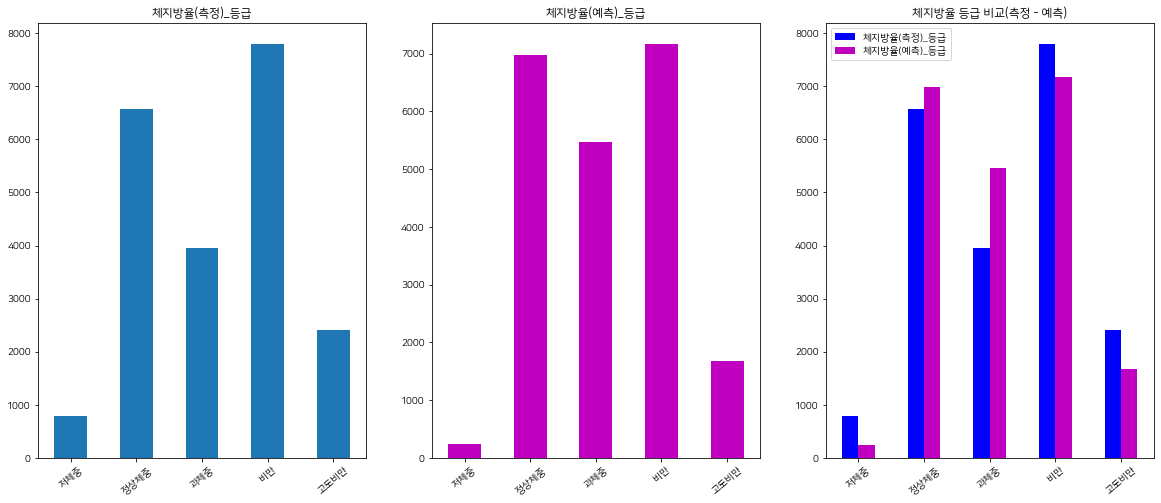

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

meas_grade_num.plot.bar(ax=ax1, title='체지방율(측정)_등급', rot=40)
pred_grade_num.plot.bar(ax=ax2, title='체지방율(예측)_등급', rot=40, color='M')
grade_num.plot.bar(ax=ax3, title='체지방율 등급 비교(측정 - 예측)', rot=40, color=['b', 'M'])
plt.savefig('체지방율_측정_예측_등급.png', bbox_inches='tight')
plt.show()

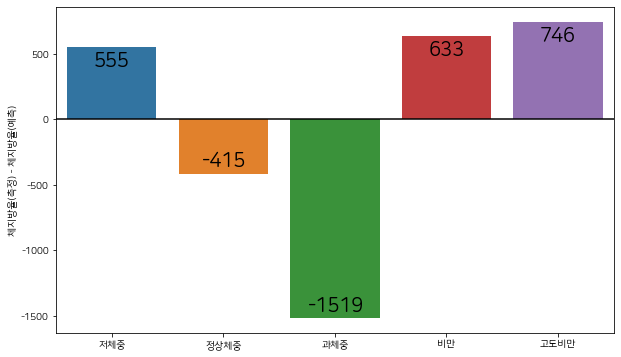

In [ ]:
import seaborn as sns
import numpy as np

grade_num['체지방율(측정) - 체지방율(예측)'] = grade_num['체지방율(측정)_등급'] - grade_num['체지방율(예측)_등급']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.barplot(ax=ax, x=grade_num.index, y='체지방율(측정) - 체지방율(예측)', data=grade_num)
ax.axhline(0, color='k')
for i in range(len(grade_num)):
    x = i
    value = grade_num['체지방율(측정) - 체지방율(예측)'][grade_num.index[i]]
    if  value > 0:
        y = value - 150
    else:
        y = value + 50
    ax.text(x, y, value, fontdict={'size': 20}, ha='center')

plt.savefig('체지방율_측정_예측_차이.png', bbox_inches='tight')
plt.show()

In [ ]:
trace_grade = grade_df.copy()
trace_grade = trace_grade[['연령(만)', '성별', 'BMI_등급', '체지방율(예측)_등급', '체지방율(측정)_등급']]
trace_grade.head()

,연령(만),성별,BMI_등급,체지방율(예측)_등급,체지방율(측정)_등급
,,,,,
160588,18.0,0,1,1.0,1.0
160589,18.0,0,1,1.0,0.0
160590,17.0,0,1,1.0,1.0
160591,18.0,0,3,2.0,3.0
160592,18.0,0,1,1.0,1.0


In [ ]:
# trace_grade['체지방율(예측)_등급'] = trace_grade['체지방율(예측)_등급'].replace({0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"})
# trace_grade['체지방율(측정)_등급'] = trace_grade['체지방율(측정)_등급'].replace({0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"})
# pred_grade_num.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)
trace_grade.head()

,연령(만),성별,BMI_등급,체지방율(예측)_등급,체지방율(측정)_등급
,,,,,
160588,18.0,0,1,1.0,1.0
160589,18.0,0,1,1.0,0.0
160590,17.0,0,1,1.0,1.0
160591,18.0,0,3,2.0,3.0
160592,18.0,0,1,1.0,1.0


In [ ]:
dummy_df = trace_grade['체지방율(예측)_등급'].value_counts()
pred_total_num = {}
for i in range(len(dummy_df)):
    pred_total_num[dummy_df.index[i]] = dummy_df.iloc[i]
# new_df = trace_grade.groupby(['체지방율(예측)_등급', '체지방율(측정)_등급']).count()
# new_df['연령(만)']

In [ ]:
pred_total_num

{3.0: 7171, 1.0: 6982, 2.0: 5466, 4.0: 1668, 0.0: 235}

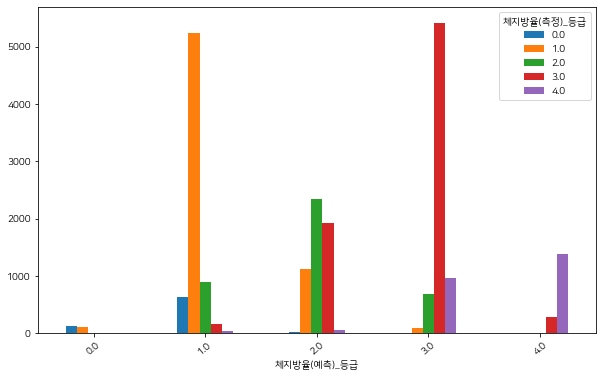

In [ ]:
grouped = trace_grade.groupby(['체지방율(예측)_등급',	'체지방율(측정)_등급']).size().unstack()
grouped.fillna(0., inplace=True)
grouped.rename(index={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, columns={0.: "저체중", 1.:"정상체중", 2.:"과체중", 3.:"비만", 4.:"고도비만"}, inplace=True)

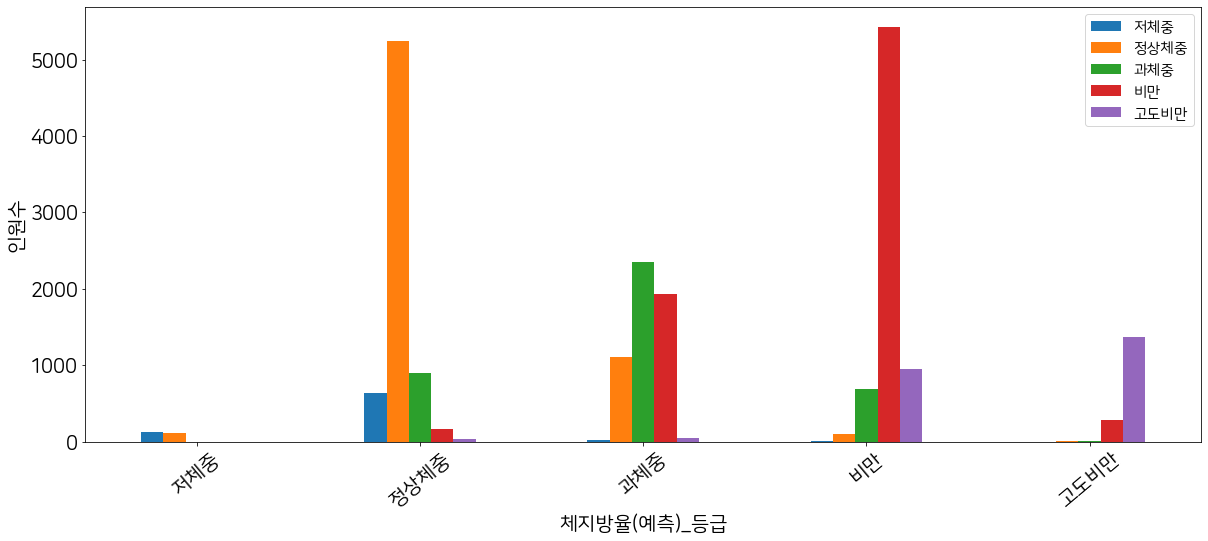

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

grouped.plot.bar(ax=ax, rot=40, ylabel='인원수', fontsize=20)
ax.set_ylabel('인원수', size=20)
ax.set_xlabel('체지방율(예측)_등급', size=20)
plt.legend(prop={'size':15})
plt.savefig('등급이동추적.png', bbox_inches='tight')


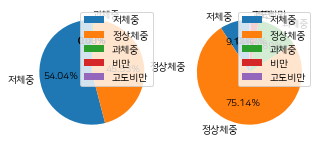

In [ ]:
from pandas.core.groupby.groupby import F
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)

forpie = grouped.T
forpie.plot.pie(ax=ax1, y='저체중', ylabel='', startangle=90, autopct=lambda p : '{:.2f}%'.format(p))
forpie.plot.pie(ax=ax2, y='정상체중', ylabel='', startangle=90, autopct=lambda p : '{:.2f}%'.format(p))
plt.legend(loc='best')

In [ ]:
forpie.head()

체지방율(예측)_등급,저체중,정상체중,과체중,비만,고도비만
체지방율(측정)_등급,,,,,
저체중,127.0,636.0,22.0,4.0,1.0
정상체중,107.0,5246.0,1114.0,97.0,3.0
과체중,1.0,900.0,2349.0,691.0,6.0
비만,0.0,168.0,1930.0,5422.0,284.0
고도비만,0.0,32.0,51.0,957.0,1374.0


In [ ]:
forpie.sort_values()

TypeError: ignored

In [ ]:
grouped.head()

체지방율(측정)_등급,저체중,정상체중,과체중,비만,고도비만
체지방율(예측)_등급,,,,,
저체중,127.0,107.0,1.0,0.0,0.0
정상체중,636.0,5246.0,900.0,168.0,32.0
과체중,22.0,1114.0,2349.0,1930.0,51.0
비만,4.0,97.0,691.0,5422.0,957.0
고도비만,1.0,3.0,6.0,284.0,1374.0


---